## Introduction to Exploratory Data Analysis and Visualization

In this lab, we will cover some basic EDAV tools and provide an example using _presidential speeches_.

<a id="part1"></a>
## Part 1: Simple summaries and graphs

This part of the lab was based on data set 1 from the [1st collaboratory boot camp during winter 2016-2017](https://github.com/DS-BootCamp-Collaboratory-Columbia/AY2016-2017-Winter). 

Data set: 2016 Presidential Election Results (Manually constructed using various online resources.)

We'll look at three sets of data collected from the 51 states. They include:

1. 2016 Presidential election results
2. 2015 Median annual hosehold income
3. 2015 Monthly average number of person participating in the the food stamp program

Across the states, we'll summarize basic statistics and study the relationship among variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

elec_data = pd.read_csv('2016_election_data/2016_presidential_election_results.tsv', delimiter='\t')
fs_data = pd.read_csv('2016_election_data/2015_monthly_average_of_person_participating_in_food_stamp_program.tsv', delimiter='\t')
income_data = pd.read_csv('2016_election_data/2015_median_annual_hosehold_income.tsv', delimiter='\t')

We'll also load two auxilary collections that will help us obtain better statistics and will also help us to better visualize the data. They are:

* 2015 Population across states
* State Abbreviations

In [2]:
sa = pd.read_csv('2016_election_data/state_abbreviations.tsv', delimiter='\t')
census_data = pd.read_csv('2016_election_data/population_by_state.tsv', delimiter='\t')

In [3]:
# Merge datasets into one dataframe.

df=pd.merge(elec_data, fs_data, on='State')
df=pd.merge(df, income_data, on="State")
df=pd.merge(df, sa, on="State")
df=pd.merge(df, census_data, on="State")

df['Trump_perc']=df['Trump']/(df['Clinton']+df['Trump']+df['Johnson'])
df['fs_perc']=df['Participation']/df['Population']
df['vote_perc']=(df['Clinton']+df['Trump']+df['Johnson'])/df['Population']
df['Trump_win']=(df['Trump']>df['Clinton'])

df.head(n=5)

,State,Sum,Dem_EV,Rep_EV,Unalloc_EV,Clinton,Trump,Johnson,Other,Participation,Median_Income,Abbr,Population,Trump_perc,fs_perc,vote_perc,Trump_win
0,Alabama,2123372,0,9,0,729547,1318255,44467,31103,889380,44509,AL,4863300,0.630060,0.182876,0.430216,True
1,Alaska,318608,0,3,0,116454,163387,18725,20042,81121,75112,AK,738432,0.547239,0.109856,0.404324,True
2,Arizona,2604657,0,11,0,1161167,1252401,106327,84762,999401,52248,AZ,6931071,0.497005,0.144191,0.363565,True
3,Arkansas,1130635,0,6,0,380494,684872,29829,35440,468904,42798,AR,2988248,0.625343,0.156916,0.366501,True
4,California,14237884,55,0,0,8753788,4483810,478500,521786,4417772,63636,CA,39250017,0.326901,0.112555,0.349455,False


We first look at the distribution of food stamp percents. 

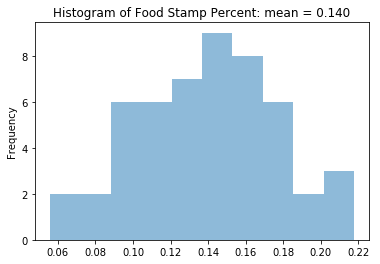

In [4]:
df.fs_perc.astype(float).plot('hist', alpha=0.5)

fs_mean = df.fs_perc.mean()
plt.title('Histogram of Food Stamp Percent: mean = {0:.3f}'.format(fs_mean)) 
plt.show()

###  Task 1

Add [standard deviation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html) to the title of the histogram. 


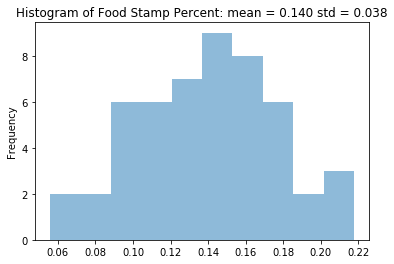

In [5]:
df.fs_perc.astype(float).plot('hist', alpha=0.5)
fs_std = df.fs_perc.std()
plt.title('Histogram of Food Stamp Percent: mean = {0:.3f} std = {1:.3f}'.format(fs_mean, fs_std))
plt.show()

The following visualization uses [plot.ly](https://plot.ly/python/getting-started/) (a powerful interactive visualization tool). Please click on the link and install plot.ly's python package. 

### Task 2
Follow the instruction from [plot.ly](https://plot.ly/python/getting-started/) to setup free account and API credentials. 

In [6]:
import plotly.plotly as py

In [7]:
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State'] + '<br>' +\
    'Population '+df['Population']+'<br>'+\
    'Med. Income '+df['Median_Income']+'<br>'+\
    'Food stamp participation '+ df['fs_perc']+'<br>'+\
    'Voted for Trump ' + df['Trump_perc']+'<br>'+\
    'Voter turn out '+df['vote_perc']+'<br>'+\
    'Trump win '+df['Trump_win']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['Abbr'],
        z = df['Trump_perc'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Fraction of votes for Trump")
        ) ]

layout = dict(
        title = '2016 US General Election Results by State<br>(Hover for more stats)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~iHyDJULgqVAiinjG/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


### Task 3
Now, you try visualize a map of the voter turn out. 

In [8]:
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['State'] + '<br>' +\
    'Population '+df['Population']+'<br>'+\
    'Med. Income '+df['Median_Income']+'<br>'+\
    'Food stamp participation '+ df['fs_perc']+'<br>'+\
    'Voted for Trump ' + df['Trump_perc']+'<br>'+\
    'Voter turn out '+df['vote_perc']+'<br>'+\
    'Trump win '+df['Trump_win']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['Abbr'],
        z = df['vote_perc'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Fraction of voter turnout")
        ) ]
layout = dict(
        title = '2016 US Voter Turnout by State<br>(Hover for more stats)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d4-cloropleth-map' )

Now let's look at some associations. 

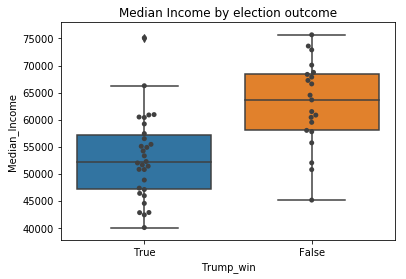

In [9]:
import seaborn as sns

ax = sns.boxplot(x=df.Trump_win, y=df.Median_Income.astype(float))
ax = sns.swarmplot(x=df.Trump_win, y=df.Median_Income.astype(float), color=".25")

ax.set_title('Median Income by election outcome')

plt.show()

### Task 4
We can also use plot.ly for boxplots. Follow the instruction and reproduce the boxplots above. 

In [10]:
import plotly.graph_objs as go

y1_data = []
y2_data = []
for i in range(0,len(df.Trump_win)):
    if(df.Trump_win[i] == "True"):
        y1_data.append(df.Median_Income[i])
    else:
        y2_data.append(df.Median_Income[i])

trace0 = go.Box(
    y=y1_data,
    boxpoints='all',
    name="True"
)
trace1 = go.Box(
    y=y2_data,
    boxpoints='all',
    name="False"
)

data = [trace0, trace1]
layout = dict(
        xaxis = dict(title = "Trump Wins"),
        yaxis = dict(title = "Median Income"))
py.iplot(dict(data=data,layout=layout))

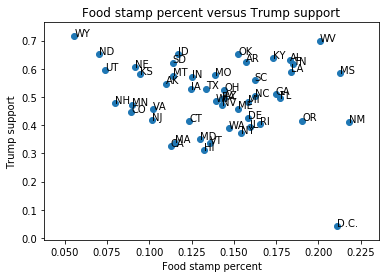

In [11]:
fig, ax = plt.subplots()
ax.scatter(df.fs_perc.astype(float), df.Trump_perc.astype(float))

ax.set_title('Food stamp percent versus Trump support')
ax.set_xlabel('Food stamp percent')
ax.set_ylabel('Trump support')

for i, txt in enumerate(df.Abbr):
    ax.annotate(txt, (df.fs_perc.astype(float)[i],df.Trump_perc.astype(float)[i]))

plt.show()

### Task 5

Make a new plot using this data set following one example from [Matplotlib Gallery](https://matplotlib.org/gallery/index.html).

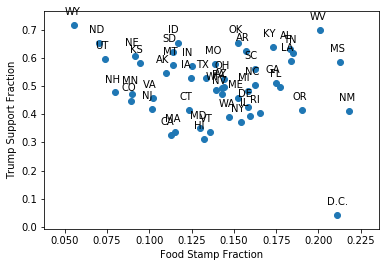

In [12]:
import matplotlib.pyplot
import pylab

y = df.Trump_perc.astype(float)
x = df.fs_perc.astype(float)

matplotlib.pyplot.xlabel("Food Stamp Fraction")
matplotlib.pyplot.ylabel("Trump Support Fraction")

matplotlib.pyplot.scatter(x,y)
for label, x1, y1 in zip(df.Abbr, x, y):
    plt.annotate(label, xy=(x1, y1), xytext=(-10, 10), textcoords='offset points')
matplotlib.pyplot.show()